## Inspección al OpenBB Terminal v.1.9.0
En el presente documento se hará una revisión a la API de OpenBB, un prometedor proyecto que busca brindar datos financieros de manera gratuita y que se puede trabajar tanto desde el terminal como desde un código de Python.

El proceso de instalación es el siguiente:
1. Contar con Python, Anaconda y Visual Studio para C++ (Community 2022 version). Todos agregando al PATH.
2. En el CMD, se debe instalar Git mediante anaconda: `conda install -c anaconda git`.
3. Se debe clonar el repositorio del proyecto OpenBB: `git clone https://github.com/OpenBB-finance/OpenBBTerminal.git`.
4. Nos dirigimos a la carpeta del proyecto: `cd openbbterminal`.
5. Se debe construir el entorno más actual de OpenBB: `conda env create -n obb --file build/conda/conda-3-9-env-full.yaml`.
6. Activamos el entorno: `conda activate obb`.
7. Instalamos algunas dependiencias: `pip install -r requirements-full.txt`.
8. Instalamos los requerimientos: `poetry install`.

Finalmente, ya se puede usar OpenBB terminal dentro de Python. En Visual Studio Code se puede usar la librería `openbb_terminal` siempre y cuando se seleccione como kernel a `obb`.

Más documentación en: `https://openbb-finance.github.io/OpenBBTerminal/`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import statsmodels.api as sm
from openbb_terminal.api import openbb

WARNING! Breaking changes incoming! Especially avoid using kwargs, since some of them will change.
For more information see the official documentation at: https://openbb-finance.github.io/OpenBBTerminal/api/


En OpenBB hay diversas secciones como: `stocks`, `crypto`, `etf`, `economy`, `forex`, `funds`, `alternative`, `econometrics`, `forecast`, entre otros. Se explorará algunas de las más resaltantes

### Stocks

En la sección de stocks se puede hacer importación de datos, gráficos, análisis cuantitativo, entre otros. Probaré con la serie de Apple. El gráfico más sencillo que puede realizarse es uno de `candle`:

Loading Daily AAPL stock with starting period 2020-07-01 for analysis.

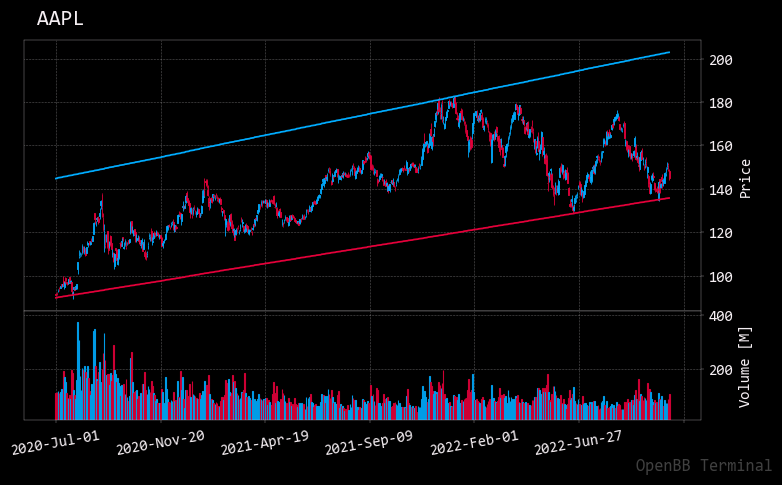

In [2]:
openbb.stocks.candle("AAPL", start_date=datetime(2020, 7, 1), add_trend=True)

Se puede pedir mayor información sobre la empresa, como por ejemplo:

In [3]:
dta = openbb.stocks.load("AAPL", start_date=datetime(2020, 1, 1))
dta.tail()

Loading Daily AAPL stock with starting period 2020-01-02 for analysis.

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,149.350006,88194300
2022-10-27,148.070007,149.050003,144.130005,144.800003,144.800003,108284100


Con una serie, uno podria realizar analisis cuantitativo `qa`. Pedir algunos estadisticos, hacer graficos, analisis de riesgo, entre otros. No obstante las funciones aun no estan habilitadas para la API, aunque ya esta integrado en el terminal. Por el contrario tiene una seccion de econometria, que sera desarrollado en el siguiente apartado.

Mediante la funcion de analisis comparativo `ca` se puede analizar mas de una serie para conseguir datos como correlaciones, analisis de sentimiento, comparacion de cashflows, entre otros

In [4]:
openbb.stocks.ca.hcorr(["AMZN", "AAPL", "KO", "META", "MSFT", "TSLA"], start_date="2022-01-01")[0]

,AMZN,AAPL,KO,META,MSFT,TSLA
AMZN,1.000000,0.909251,0.043710,0.671075,0.882992,0.856825
AAPL,0.909251,1.000000,0.224158,0.610984,0.857914,0.881652
KO,0.043710,0.224158,1.000000,0.017406,0.253716,0.206901
META,0.671075,0.610984,0.017406,1.000000,0.819415,0.650530
MSFT,0.882992,0.857914,0.253716,0.819415,1.000000,0.783628
TSLA,0.856825,0.881652,0.206901,0.650530,0.783628,1.000000


In [5]:
openbb.stocks.ca.sentiment(["AMZN", "AAPL", "KO", "META", "MSFT", "TSLA"])

,AMZN,AAPL,KO,META,MSFT,TSLA
2022-10-17,0.274,0.228,0.302,-0.044,0.376,0.002
2022-10-18,0.286,0.050,0.107,0.057,0.082,0.196
2022-10-19,0.109,-0.051,0.110,0.015,0.164,0.106
2022-10-20,0.154,-0.042,0.272,-0.192,-0.195,-0.036
2022-10-21,-0.018,0.035,0.412,0.021,-0.017,-0.074
2022-10-24,0.154,0.140,0.396,-0.093,0.236,-0.150
2022-10-25,0.040,0.079,0.423,-0.216,0.052,0.067
2022-10-26,0.249,0.210,0.253,-0.272,-0.098,0.138
2022-10-27,0.126,-0.026,0.384,-0.065,0.135,-0.175
2022-10-28,0.253,0.006,0.391,-0.079,-0.193,0.213


In [6]:
openbb.stocks.ca.cashflow(["AMZN", "AAPL", "KO", "META", "MSFT", "TSLA"], timeframe="2020")

Other available yearly timeframes are: 2017, 2018, 2019, 2020, 2021

,AMZN,AAPL,KO,META,MSFT,TSLA
Item,,,,,,
Net Income before Extraordinaries,21.33B,57.41B,7.77B,29.15B,44.28B,862M
Net Income Growth,84.08%,3.90%,-13.54%,57.67%,12.85%,211.23%
"Depreciation, Depletion & Amortization",25.25B,11.06B,1.54B,6.86B,12.3B,2.32B
Depreciation and Depletion,-,11.06B,-,6.39B,10.7B,2.27B
Amortization of Intangible Assets,-,-,-,473M,1.6B,51M
Deferred Taxes & Investment Tax Credit,(554M),(215M),(18M),(1.19B),11M,-
Deferred Taxes,(554M),(215M),(18M),(1.19B),11M,-
Investment Tax Credit,-,-,-,-,-,-
Other Funds,6.56B,6.73B,(132M),6.65B,5.57B,2.58B


### Econometrics
En la seccion de econometria se puede realizar algunos test como de normalidad, raiz unitaria, causalidad de Granger o cointegracion. Lo hare en base a la serie de Apple: 

In [7]:
dta = dta["Close"]
dta

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2022-10-21    147.270004
2022-10-24    149.449997
2022-10-25    152.339996
2022-10-26    149.350006
2022-10-27    144.800003
Name: Close, Length: 712, dtype: float64

In [8]:
openbb.econometrics.norm(data=dta)

,Kurtosis,Skewness,Jarque-Bera,Shapiro-Wilk,Kolmogorov-Smirnov
Statistic,-4.645754,-5.806573,48.383353,0.942548,1.0
p-value,0.000000,0.000000,0.000000,0.000000,0.0


In [9]:
openbb.econometrics.root(data=dta)

,ADF,KPSS
Test Statistic,-1.751716,0.371821
P-Value,0.404683,0.089301
NLags,1.000000,0.000000
Nobs,710.000000,0.000000
ICBest,3358.276853,0.000000


Para el caso de la causalidad de Granger y para el test de cointegracion se necesita una serie adicional, por ejemplo la de Microsoft

In [10]:
dta2 = openbb.stocks.load("MSFT", start_date=datetime(2020, 1, 1))["Close"]
dta2

Loading Daily MSFT stock with starting period 2020-01-02 for analysis.

date
2020-01-02    160.619995
2020-01-03    158.619995
2020-01-06    159.029999
2020-01-07    157.580002
2020-01-08    160.089996
                 ...    
2022-10-21    242.119995
2022-10-24    247.250000
2022-10-25    250.660004
2022-10-26    231.320007
2022-10-27    226.750000
Name: Close, Length: 712, dtype: float64

In [11]:
openbb.econometrics.granger(dependent_series=dta2, independent_series=dta, lags=2)

{2: ({'ssr_ftest': (1.9860193408400912, 0.13800773380568107, 705.0, 2),
   'ssr_chi2test': (4.000209168784297, 0.13532113001839494, 2),
   'lrtest': (3.9889825329391897, 0.13608286647713555, 2),
   'params_ftest': (1.9860193408403704, 0.13800773380563788, 705.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [12]:
openbb.econometrics.coint(dependent_series=dta2, independent_series=dta)

(59.459544731912246,
 1.4409595907100698,
 0.006372364186562019,
 date
 2020-01-02    -7.037605
 2020-01-03    -7.985700
 2020-01-06    -8.429463
 2020-01-07    -9.371531
 2020-01-08    -8.590684
                 ...    
 2022-10-21   -29.549675
 2022-10-24   -27.560951
 2022-10-25   -28.315320
 2022-10-26   -43.346861
 2022-10-27   -41.360498
 Length: 712, dtype: float64,
 -1.3535545002030722,
 0.6043292233509147)

Luego se puede estimar mediante OLS las futuras cifras para la serie de Apple. Esta mediante variaciones, ya que mediante los test se encuentra la serie tiene raiz unitaria 

In [13]:
dta = openbb.stocks.load("AAPL", start_date=datetime(2020, 1, 1))[["Close"]]

dta["Retornos"] = (np.log(dta)-np.log(dta).shift(1))*100
dta["Retornos_1"] = dta["Retornos"].shift(1)
dta = dta[["Retornos", "Retornos_1"]].dropna()

y=dta["Retornos"]
X=dta["Retornos_1"]

dta

Loading Daily AAPL stock with starting period 2020-01-02 for analysis.

,Retornos,Retornos_1
date,,
2020-01-06,0.793667,-0.976960
2020-01-07,-0.471414,0.793667
2020-01-08,1.595827,-0.471414
2020-01-09,2.101837,1.595827
2020-01-10,0.225815,2.101837
...,...,...
2022-10-21,2.669948,-0.327242
2022-10-24,1.469420,2.669948
2022-10-25,1.915297,1.469420


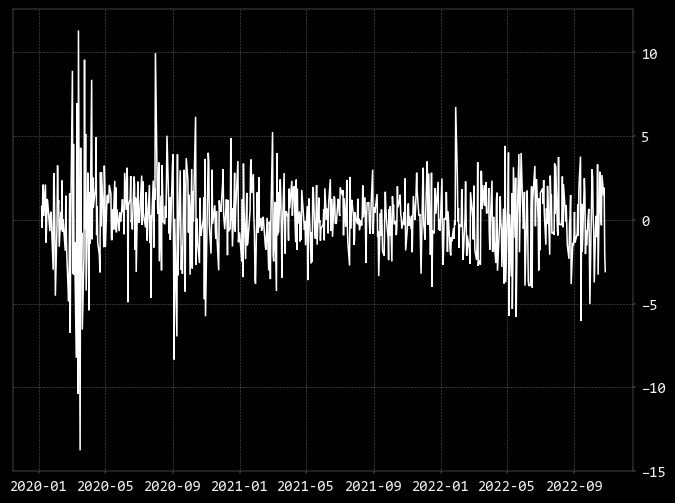

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(dta["Retornos"], color="white")
plt.show()

Por el momento, la regresion la hare con `statsmodels` debido a dificultades con `openbb.econometrics.ols`, el cual tambien estima por esa libreria

In [15]:
model = sm.OLS(y, X).fit()
resids = model.resid

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               Retornos   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.023
Method:                 Least Squares   F-statistic:                              17.91
Date:                Fri, 28 Oct 2022   Prob (F-statistic):                    2.62e-05
Time:                        13:26:48   Log-Likelihood:                         -1591.9
No. Observations:                 710   AIC:                                      3186.
Df Residuals:                     709   BIC:                                      3190.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

El análisis de los residuos se puede hacer mediante `dwat`, `bgod` y `bpag`. El primero es el test de Durwin-Watson, el segundo es Breush-Godfrey y el ultimo Breush-Pagan

In [16]:
openbb.econometrics.dwat(residual=resids)

1.99

In [17]:
bgod_test = openbb.econometrics.bgod(model=model)

print(f"LM_stat: {bgod_test[0]}, p_value: {bgod_test[1]}, F_stat: {bgod_test[2]}, f_pvalue: {bgod_test[3]}")

LM_stat: 0.5325450072088789, p_value: 0.9116853988171402, F_stat: 0.17543974790182168, f_pvalue: 0.9130330171785572


In [18]:
bpag_test = openbb.econometrics.bpag(model=model)

print(f"LM_stat: {bpag_test[0]}, p_value: {bpag_test[1]}, F_stat: {bpag_test[2]}, f_pvalue: {bpag_test[3]}")

LM_stat: 0.12471739128498083, p_value: nan, F_stat: 0.12456361361967375, f_pvalue: 0.7242415416397692


### Forecast
Para el caso del forecasting, existen 11 algoritmos matemáticos/estadísticos de proyecciones de series de tiempo para la version 1.9.0. Entre ellas se encuentran las siguientes:

* expo -> Probabilistic Exponential Smoothing
* theta -> Theta Method
* linrerg -> Probabilistic Linear Regression (Logístico)
* regr -> Regression -> Resultado Determinístico
* rnn -> Probabilistic Recurrent Neural Network (RNN, LSTM, GRU)
* brnn -> Block Recurrent Neural Network (RNN, LSTM, GRU) (feat. Past covariates)
* nbeats -> Neural Bayesian Estimation (feat. Past covariates)
* tcn -> Temporal Convolutional Neural Network (feat. Past covariates)
* trans -> Transformer model (feat. Past covariates)
* tft -> Temporal Fusion Transformer (feat. Past covariates)
* nhits -> Neural Hierarchical Interpolation for Time Series Forecasting (feat. covariates)

Usando la serie ya importada de AAPL, se puede pedir la proyeccion de algunos de los algoritmos. He seleccionado 6: `expo`, `linregr`, `regr`, `rnn`, `rnn`, `nbeats`, `tcn`

In [19]:
dta_aapl = openbb.stocks.load("AAPL", start_date=datetime(2020, 1, 1))[["Close"]].reset_index()
dta_aapl.tail()

Loading Daily AAPL stock with starting period 2020-01-02 for analysis.

,date,Close
707,2022-10-21,147.270004
708,2022-10-24,149.449997
709,2022-10-25,152.339996
710,2022-10-26,149.350006
711,2022-10-27,144.800003


Primero comenzaré con una `rnn`, una Red Netural Recurrente

In [20]:
?openbb.forecast.rnn

Signature:
openbb.forecast.rnn(
    target_column: str = 'close',
    dataset_name: str = '',
    n_predict: int = 5,
    train_split: float = 0.85,
    forecast_horizon: int = 5,
    model_type: str = 'LSTM',
    hidden_dim: int = 20,
    dropout: float = 0.0,
    batch_size: int = 16,
    n_epochs: int = 100,
    learning_rate: float = 0.001,
    model_save_name: str = 'rnn_model',
    training_length: int = 20,
    input_chunk_size: int = 14,
    force_reset: bool = True,
    save_checkpoints: bool = True,
    export: str = '',
    residuals: bool = False,
    forecast_only: bool = False,
    start_date: Optional[datetime.datetime] = None,
    end_date: Optional[datetime.datetime] = None,
    naive: bool = False,
    external_axes: Optional[List[axes]] = None,
    chart: bool = False,
)
Docstring:
API function, use the chart kwarg for getting the view model and it's plot. See every parameter below:

    Parameters
    ----------
        data (Union[pd.Series, pd.DataFrame]):
       

In [21]:
rnn_f = openbb.forecast.rnn(
    data=dta_aapl,
    target_column="Close",
    n_predict=5
)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting RNN for 5 days


  0%|          | 0/108 [00:00<?, ?it/s]

RNN model obtains MAPE: 4.15%

In [22]:
rnn_f

(<TimeSeries (DataArray) (date: 736, component: 1, sample: 1)>
 array([[[ 75.0875  ]],
 
        [[ 74.3575  ]],
 
        [[ 74.95    ]],
 
        [[ 74.5975  ]],
 
        [[ 75.7975  ]],
 
        [[ 77.4075  ]],
 
        [[ 77.5825  ]],
 
        [[ 79.24    ]],
 
        [[ 78.17    ]],
 
        [[ 77.835   ]],
 
 ...
 
        [[138.38    ]],
 
        [[142.41    ]],
 
        [[143.75    ]],
 
        [[143.86    ]],
 
        [[143.39    ]],
 
        [[147.27    ]],
 
        [[149.45    ]],
 
        [[152.34    ]],
 
        [[149.35    ]],
 
        [[144.8     ]]], dtype=float32)
 Coordinates:
   * date       (date) datetime64[ns] 2020-01-02 2020-01-03 ... 2022-10-27
   * component  (component) object 'Close'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (time: 108, component: 1, sample: 1)>
 array([[[131.78807]],
 
        [[140.13199]],
 
        [[141.90364]],
 
        [[14

El resultado es una tupla de valores, donde el item cero es la serie historica, el item uno es el set usado para la proyeccion, el item dos es la proyeccion y el item tres es MAPE (Error Porcentual Absoluto Medio). Me quedare con el item 2, el de la proyeccion

In [23]:
rnn_f = rnn_f[2]
rnn_f

<TimeSeries (DataArray) (date: 5, component: 1, sample: 500)>
array([[[146.98944, 150.6786 , 147.21973, ..., 147.06581, 150.7459 ,
         150.32631]],

       [[148.57466, 147.3584 , 148.84702, ..., 149.82994, 151.03867,
         147.66068]],

       [[147.74603, 146.23943, 148.14157, ..., 151.79709, 153.16931,
         152.21904]],

       [[144.19878, 144.96503, 148.92224, ..., 151.97682, 153.44328,
         152.3302 ]],

       [[148.43205, 150.94624, 143.06453, ..., 154.58238, 155.7811 ,
         150.96349]]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 2022-10-28 2022-10-31 ... 2022-11-03
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

Es importante notar que los valores que terminan de la proyeccion son estocasticos. Existen 500 valores por cada dia de proyeccion con el que se puede obtener una banda de confianza y una mediana. Para extraer unicamente la mediana se usara la funcion `.quantify_df()`

In [24]:
rnn_f = rnn_f.quantile_df()
rnn_f

,Close_0.5
date,
2022-10-28,146.696259
2022-10-31,146.781662
2022-11-01,147.237793
2022-11-02,147.003365
2022-11-03,147.279686


Una vez entendida la dinamica, se podria realizar la misma logica para cada uno de los 6 algoritmos seleccionados. Algunos nos daran valor unico como `regr`, `nbeats` y `tcn`, y otros sera estocastico como `expo`, `linreg` y `rnn`

In [25]:
# Declaracion
ticker = "AAPL"
days_to_predict = 5
target = "Close"

# Importacion
serie = openbb.stocks.load(ticker).reset_index()

# Estimacion
expo_f = openbb.forecast.expo(data=serie, target_column=target, n_predict=days_to_predict)[2]
linregr_f = openbb.forecast.linregr(data=serie, target_column=target, n_predict=days_to_predict)[2]
regr_f = openbb.forecast.regr(data=serie, target_column=target, n_predict=days_to_predict)[2]
rnn_f = openbb.forecast.rnn(data=serie, target_column=target, n_predict=days_to_predict)[2]
nbeats_f = openbb.forecast.nbeats(data=serie, target_column=target, n_predict=days_to_predict)[2]
tcn_f = openbb.forecast.tcn(data=serie, target_column=target, n_predict=days_to_predict)[2]

# Conversion a Dataframes
expo_f = expo_f.quantile_df().reset_index().rename({f"{target}_0.5": "Expo"}, axis=1)
linregr_f = linregr_f.quantile_df().reset_index().rename({f"{target}_0.5": "Linregr"}, axis=1)
regr_f = regr_f.pd_dataframe().reset_index().rename({f"{target}": "Regr"}, axis=1)
rnn_f = rnn_f.quantile_df().reset_index().rename({f"{target}_0.5": "RNN"}, axis=1)
nbeats_f = nbeats_f.pd_dataframe().reset_index().rename({f"{target}": "Nbeats"}, axis=1)
tcn_f = tcn_f.pd_dataframe().reset_index().rename({f"{target}": "TCN"}, axis=1)

# Union: merge
dta = expo_f.copy()

dta = dta.merge(linregr_f, how="inner").merge(regr_f, how="inner").merge(rnn_f, how="inner")\
    .merge(nbeats_f, how="inner").merge(tcn_f, how="inner")

# Setting index
dta.set_index("date", inplace=True)

Loading Daily AAPL stock with starting period 2019-10-24 for analysis.

  0%|          | 0/115 [00:00<?, ?it/s]

Exponential smoothing obtains MAPE: 3.61%

Predicting Logistic Regression for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

Logistic Regression model obtains MAPE: 3.57%

Predicting Regression for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

Regression model obtains MAPE: 2.82%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting RNN for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

RNN model obtains MAPE: 4.04%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting NBEATS for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

NBEATS model obtains MAPE: 4.77%

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting TCN for 5 days


  0%|          | 0/115 [00:00<?, ?it/s]

TCN model obtains MAPE: 7.71%

In [26]:
dta

,Expo,Linregr,Regr,RNN,Nbeats,TCN
date,,,,,,
2022-10-28,144.859421,145.022939,145.064728,146.147560,146.694611,137.065033
2022-10-31,145.534430,145.241653,148.482697,146.076141,142.393768,134.405685
2022-11-01,145.611266,145.419987,148.456268,146.232674,146.871490,131.528702
2022-11-02,145.840370,144.802724,147.439560,146.030731,146.004227,134.559052
2022-11-03,145.866440,144.592129,146.876907,146.323547,145.671371,136.316544


Los resultados parecen ser muy parecidos para `expo`, `linregr`, `regr` y `rnn`. No obstante, `nbeats` y `tcn` tienen resultados que podrían ser considerados como outliers, en particular el del segundo, debido a que están más alejados a los demás modelos.

Todos los algoritmos han sido estimados mediante sus condiciones por _default_. Seguramente para que los resultados mejoren en los últimos dos algoritmos se requiera realizar algunos ajustes adicionales

### Economy
Sirve para acceder a datos de diversos paises, variables macroeconómicas y variables financieras. Los principales codigos y tickers son los siguientes:

In [27]:
openbb.economy.macro_countries()

{'Albania': 'ALL',
 'Argentina': 'ARS',
 'Australia': 'AUD',
 'Austria': 'EUR',
 'Azerbaijan': 'AZN',
 'Bangladesh': 'BDT',
 'Belarus': 'BYR',
 'Belgium': 'EUR',
 'Bhutan': 'BTN',
 'Bosnia_and_Herzegovina': 'BAM',
 'Botswana': 'BWP',
 'Brazil': 'BRL',
 'Bulgaria': 'BGN',
 'Cambodia': 'KHR',
 'Cameroon': 'XAF',
 'Canada': 'CAD',
 'Chile': 'CLP',
 'China': 'CNY',
 'Colombia': 'COP',
 'Croatia': 'HRK',
 'Cyprus': 'EUR',
 'Czechia': 'CZK',
 'Denmark': 'DKK',
 'Dominican_Republic': 'DOP',
 'Egypt': 'EGP',
 'Estonia': 'EUR',
 'European_Union': 'EUR',
 'Finland': 'EUR',
 'France': 'EUR',
 'Germany': 'EUR',
 'Greece': 'EUR',
 'Honduras': 'HNL',
 'Hong Kong': 'HKD',
 'Hungary': 'HUF',
 'India': 'INR',
 'Indonesia': 'IDR',
 'Iran': 'IRR',
 'Ireland': 'EUR',
 'Israel': 'ILS',
 'Italy': 'EUR',
 'Japan': 'JPY',
 'Kazakhstan': 'KZT',
 'Laos': 'LAK',
 'Latvia': 'EUR',
 'Lebanon': 'LBP',
 'Lithuania': 'EUR',
 'Luxembourg': 'EUR',
 'Macedonia': 'MKD',
 'Malaysia': 'MYR',
 'Malta': 'EUR',
 'Mexico': 'MX

In [28]:
openbb.economy.macro_parameters()

{'RGDP': {'name': 'Real gross domestic product',
  'period': 'Quarterly',
  'description': 'Inflation-adjusted measure that reflects the value of all goods and services produced by an economy in a given year (chain-linked series).'},
 'RPRC': {'name': 'Real private consumption',
  'period': 'Quarterly',
  'description': 'All purchases made by consumers adjusted by inflation (chain-linked series).'},
 'RPUC': {'name': 'Real public consumption',
  'period': 'Quarterly',
  'description': 'All purchases made by the government adjusted by inflation (chain-linked series).'},
 'RGFCF': {'name': 'Real gross fixed capital formation',
  'period': 'Quarterly',
  'description': 'The acquisition of produced assets adjusted by inflation (chain-linked series).'},
 'REXP': {'name': 'Real exports of goods and services',
  'period': 'Quarterly',
  'description': 'Transactions in goods and services from residents to non-residents adjusted for inflation (chain-linked series)'},
 'RIMP': {'name': 'Real imp

In [29]:
openbb.economy.available_indices()

{'sp500': {'name': 'S&P 500 Index', 'ticker': '^GSPC'},
 'sp400': {'name': 'S&P 400 Mid Cap Index', 'ticker': '^SP400'},
 'sp600': {'name': 'S&P 600 Small Cap Index', 'ticker': '^SP600'},
 'sp500tr': {'name': 'S&P 500 TR Index', 'ticker': '^SP500TR'},
 'sp_xsp': {'name': 'S&P 500 Mini SPX Options Index', 'ticker': '^XSP'},
 'nyse_ny': {'name': 'NYSE US 100 Index', 'ticker': '^NY'},
 'dow_djus': {'name': 'Dow Jones US Index', 'ticker': '^DJUS'},
 'nyse': {'name': 'NYSE Composite Index', 'ticker': '^NYA'},
 'amex': {'name': 'NYSE-AMEX Composite Index', 'ticker': '^XAX'},
 'nasdaq': {'name': 'Nasdaq Composite Index', 'ticker': '^IXIC'},
 'nasdaq100': {'name': 'NASDAQ 100', 'ticker': '^NDX'},
 'nasdaq100_ew': {'name': 'NASDAQ 100 Equal Weighted Index',
  'ticker': '^NDXE'},
 'nasdaq50': {'name': 'NASDAQ Q50 Index', 'ticker': '^NXTQ'},
 'russell1000': {'name': 'Russell 1000 Index', 'ticker': '^RUI'},
 'russell2000': {'name': 'Russell 2000 Index', 'ticker': '^RUT'},
 'cboe_bxr': {'name': 'CB

Se puede importar series macroeconomicas como las de Estados Unidos, pais donde la informacion esta mas completa, pero tambien el de Peru, aunque solo esta disponible algunas cuantas series del total

In [30]:
openbb.economy.macro(parameters=["RGDP", "CONF", "CA"], countries=["United_States"])

(           United_States                        
                     RGDP          CONF        CA
 date                                            
 1947-01-01      2.034450           NaN  0.009405
 1947-04-01      2.029024           NaN  0.009873
 1947-07-01      2.024834           NaN  0.010081
 1947-10-01      2.056508           NaN  0.007797
 1948-01-01      2.087442           NaN  0.004916
 ...                  ...           ...       ...
 2022-03-01           NaN  6.391000e-11       NaN
 2022-04-01     19.895272  7.015000e-11 -1.020505
 2022-05-01           NaN  6.284000e-11       NaN
 2022-06-01           NaN  5.380000e-11       NaN
 2022-07-01     20.021720           NaN       NaN
 
 [803 rows x 3 columns],
 {'United_States': {'RGDP': 'USD', 'CONF': None, 'CA': 'USD'}},
 ' [in Trillions]')

In [31]:
openbb.economy.macro(parameters=["RGDP"], countries=["Peru"])

(               Peru
                RGDP
 date               
 2007-01-01   74.911
 2007-04-01   81.059
 2007-07-01   79.962
 2007-10-01   83.761
 2008-01-01   82.326
 ...             ...
 2021-04-01  138.627
 2021-07-01  138.241
 2021-10-01  143.537
 2022-01-01  132.980
 2022-04-01  132.977
 
 [62 rows x 1 columns],
 {'Peru': {'RGDP': 'PEN'}},
 ' [in Billions]')

Tambien se puede acceder a las series financieras mediante sus nombres o tickers

In [32]:
openbb.economy.index(["sp500", "^vix", "dxy"])

,sp500,^vix,dxy
Date,,,
1950-01-03,16.660000,NaN,NaN
1950-01-04,16.850000,NaN,NaN
1950-01-05,16.930000,NaN,NaN
1950-01-06,16.980000,NaN,NaN
1950-01-09,17.080000,NaN,NaN
...,...,...,...
2022-10-21,3752.750000,29.690001,112.010002
2022-10-24,3797.340088,29.850000,111.989998
2022-10-25,3859.110107,28.459999,110.949997


Tambien se puede consultar los futuros de algunos productos como `Indices`, `Energy`, `Metals`, `Meats`, `Grains`, `Softs`, `Bonds`, `Currencies`. Esta informacion sale de la pagina web `finviz`

In [33]:
openbb.economy.futures()

,,Price,Chg,%Chg
0,Crude Oil,87.52,-1.56,-1.75
1,Brent Crude,93.37,-1.67,-1.76
2,Gold,1644.60,-21.00,-1.26
3,Silver,19.150,-0.344,-1.76
4,Natural Gas,5.955,-0.181,-2.95
5,Unleaded Gasoline,2.5421,-0.0994,-3.76
6,Copper,3.4370,-0.0825,-2.34
7,Corn,679.75,-2.50,-0.37
8,Wheat,830.25,-8.25,-0.98
9,Bloomberg Commodity Index,111.76,-1.49,-1.32


In [34]:
openbb.economy.future(future_type="Indices")

,prevClose,last,change
label,,,
DJIA,32074.0000,32830.00,2.36
VIX,26.9184,26.25,-2.48
Nasdaq 100,11235.2500,11544.25,2.75
Nikkei 225,27085.0000,27475.00,1.44
Euro Stoxx 50,3605.0000,3631.00,0.72
S&P 500,3819.5000,3899.75,2.10
Russell 2000,1810.2000,1843.10,1.82
DAX,13244.0000,13331.00,0.66


In [35]:
openbb.economy.future(future_type="Energy")

,prevClose,last,change
label,,,
Ethanol,2.4600,2.4650,0.20
Gasoline RBOB,2.6415,2.5464,-3.60
Crude Oil Brent,96.9600,95.5600,-1.44
Natural Gas,5.8750,5.6970,-3.03
Heating Oil,3.7067,3.7308,0.65
Crude Oil WTI,89.0800,87.6700,-1.58


In [36]:
openbb.economy.future(future_type="Metals")

,prevClose,last,change
label,,,
Silver,19.4940,19.1550,-1.74
Platinum,967.4000,948.0000,-2.01
Palladium,1938.2000,1893.0000,-2.33
Copper,3.5195,3.4375,-2.33
Gold,1665.6000,1645.0000,-1.24


In [37]:
openbb.economy.future(future_type="Meats")

,prevClose,last,change
label,,,
Lean Hogs,85.125,86.125,1.17
Live Cattle,153.425,152.925,-0.33
Feeder Cattle,180.450,180.500,0.03


In [38]:
openbb.economy.future(future_type="Grains")

,prevClose,last,change
label,,,
Wheat,838.500,830.25,-0.98
Soybeans,1393.500,1400.00,0.47
Rough Rice,16.345,16.50,0.95
Oats,358.500,367.00,2.37
Soybean Meal,415.400,424.60,2.21
Soybean oil,72.300,71.84,-0.64
Corn,682.250,679.75,-0.37
Canola,902.200,910.40,0.91


In [39]:
openbb.economy.future(future_type="Softs")

,prevClose,last,change
label,,,
Sugar,17.71,17.63,-0.45
Lumber,476.50,464.00,-2.62
Coffee,178.85,172.45,-3.58
Orange Juice,198.65,200.00,0.68
Cotton,75.11,72.11,-3.99
Cocoa,2314.00,2304.00,-0.43


In [40]:
openbb.economy.future(future_type="Bonds")

,prevClose,last,change
label,,,
2 Year Note,102.550781,102.375000,-0.17
10 Year Note,111.687500,111.046875,-0.57
5 Year Note,107.343750,106.921875,-0.39
30 Year Bond,122.343750,121.250000,-0.89


In [41]:
openbb.economy.future(future_type="Currencies")

,prevClose,last,change
label,,,
USD,110.45300,110.71500,0.24
CHF,1.01350,1.00895,-0.45
NZD,0.58365,0.58070,-0.51
JPY,0.68765,0.68130,-0.92
EUR,0.99995,0.99820,-0.18
CAD,0.73740,0.73445,-0.40
GBP,1.15760,1.16130,0.32
AUD,0.64690,0.64160,-0.82
